# TEST NOTEBOOK

In [1]:
from tools_starter_kit import *
from utils import abs_path_from_filename, load_labels, output_stats

In [2]:
def mip_distance(volume, z_vec):
    volume_max, kmax = compute_mip(volume); volume_max_range = (np.min(np.abs(volume_max)), np.max(np.abs(volume_max)))
    alpha_data = np.clip(1.8 * ((np.abs(volume_max) - volume_max_range[0]) / (volume_max_range[1] - volume_max_range[0])) - 0.25, 0, 1,)
    return z_vec[kmax]

In [3]:
dummy_labels, radar_labels = load_labels()

In [29]:
filename = "20221110-104101-918"
# filename = "20221110-104105-289"
volume, x_vec, y_vec, z_vec = import_volume(
    abs_path_from_filename("dummy", filename)
)

In [31]:
mipimage = mip_distance(volume, z_vec)

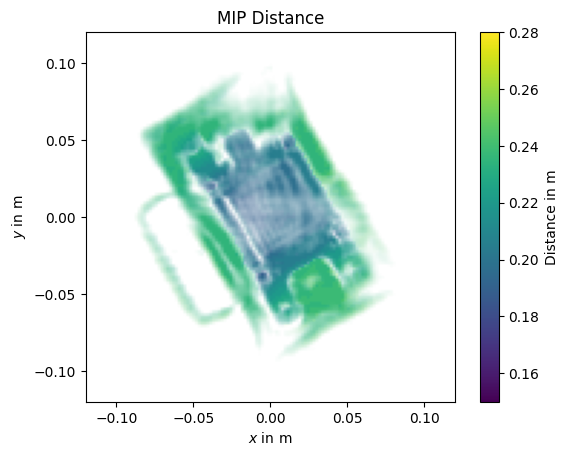

In [32]:
volume_max, kmax = compute_mip(volume); volume_max_range = (np.min(np.abs(volume_max)), np.max(np.abs(volume_max)))
alpha_data = np.clip(1.8 * ((np.abs(volume_max) - volume_max_range[0]) / (volume_max_range[1] - volume_max_range[0])) - 0.25, 0, 1,)
display(mipimage, img_title="MIP Distance", cmap_label="Distance in m", alphadata=alpha_data, xvec=x_vec, yvec=y_vec, clim=(0.15, 0.28), xlabel="$x$ in m", ylabel="$y$ in m")

In [33]:
dummy_labels[filename]

{'p_pivot': [0.0035947924459209272, 0.004956384911560005, 0.19240547776518577],
 'alpha': -0.2707527075,
 'beta': -3.068530685,
 'gamma': -2.0847849275}

In [34]:
vol_max_abs = np.abs(volume_max)

In [35]:
vol_max_abs -= np.min(vol_max_abs)
vol_max_abs /= np.max(vol_max_abs)

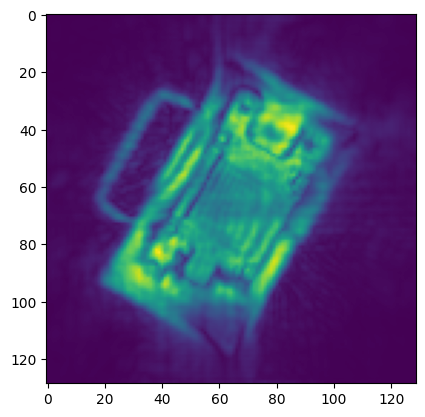

In [36]:
plt.imshow(vol_max_abs)

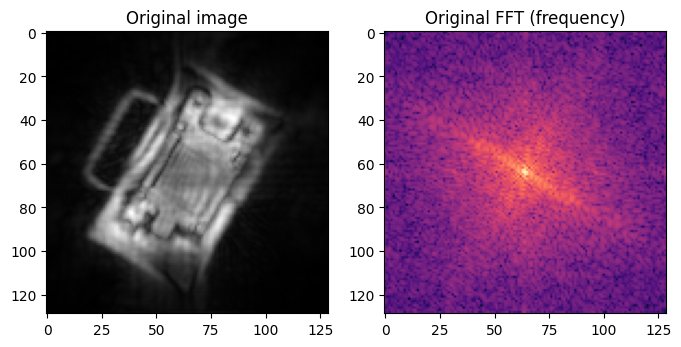

In [47]:
from scipy.fft import fft2, fftshift
from skimage import img_as_float
from skimage.color import rgb2gray
from skimage.filters import window

image = vol_max_abs.copy()


image_f = np.abs(fftshift(fft2(image)))

fig, axes = plt.subplots(1, 2, figsize=(8, 8))
ax = axes.ravel()
ax[0].set_title("Original image")
ax[0].imshow(image, cmap='gray')
ax[1].set_title("Original FFT (frequency)")
fft_image = np.log(image_f)
ax[1].imshow(fft_image, cmap='magma')
plt.show()

In [38]:
from scipy import ndimage as ndim

image = vol_max_abs.copy()

In [39]:
res = ndim.center_of_mass(image)

In [40]:
res

(65.09840587903825, 62.3348677111446)

In [41]:
x_vec[int(res[0])], y_vec[int(res[1])]

(0.0018750000000001127, -0.0037499999999998923)

In [64]:
def get_array(name):
    return np.array([dummy_labels[name]['alpha'], dummy_labels[name]['beta'], dummy_labels[name]['gamma']])

In [93]:
step = 16
ang_diff = 0
best_pair = ()
for n1, n2 in zip(by_xyz_sqr[:-step], by_xyz_sqr[step:]):
    this = np.sum((get_array(n2) - get_array(n1))**2)
    if this > ang_diff:
        ang_diff = this
        best_pair = (n1, n2)
ang_diff, best_pair

(961.2104137743555, ('20221110-110756-408', '20221110-112523-061'))

In [3]:
C0 = 299792458
FC = 77e9
LAMBDA = C0 / FC

Z_IDX = 13

In [10]:

Nx = x_vec.size
Ny = y_vec.size

kx = (np.arange(-Nx / 2, Nx / 2 - 1)) / ((Nx - 1) * np.diff(x_vec[:2]))
ky = (np.arange(-Ny / 2, Ny / 2 - 1)) / ((Ny - 1) * np.diff(y_vec[:2]))

kx_n = kx * LAMBDA
ky_n = ky * LAMBDA

volume_max, kmax = compute_mip(volume)
volume_max_range = (np.min(np.abs(volume_max)), np.max(np.abs(volume_max)))
alpha_data = np.clip(
    1.8 * ((np.abs(volume_max) - volume_max_range[0]) / (volume_max_range[1] - volume_max_range[0])) - 0.25, 0, 1,
)


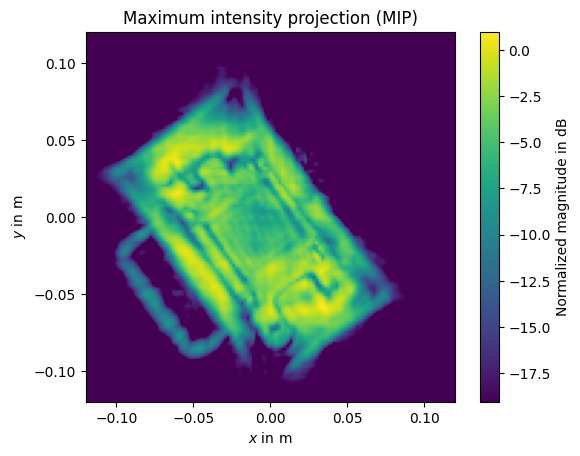

In [13]:

# 1 --> visualize magnitude of the MIP
image = 20 * np.log10(np.abs(volume_max / np.max(volume_max)))
display(
    image,
    img_title="Maximum intensity projection (MIP)",
    cmap_label="Normalized magnitude in dB",
    xvec=x_vec,
    yvec=y_vec,
    dynamic_range=20,
    xlabel="$x$ in m",
    ylabel="$y$ in m",
)


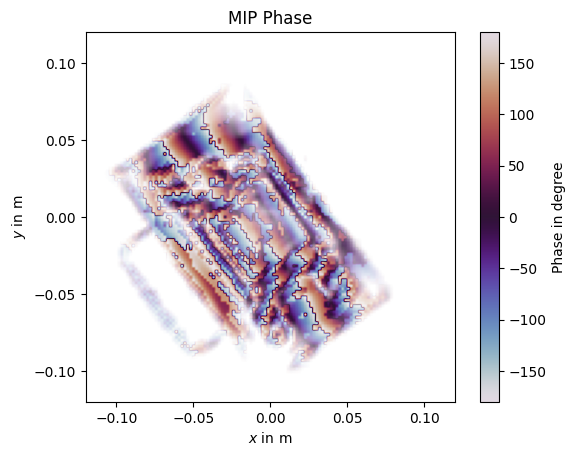

In [12]:

# 2 --> visualize phase of the MIP (opacity scaled by alpha_data)
_, volume_max_phase = complex2magphase(
    np.multiply(volume_max, np.exp(((1j * 2 * math.pi) / LAMBDA) * 2 * z_vec[kmax]))
)
display(
    180 / math.pi * volume_max_phase,
    color_map=plt.get_cmap("twilight"),
    img_title="MIP Phase",
    cmap_label="Phase in degree",
    alphadata=alpha_data,
    xvec=x_vec,
    yvec=y_vec,
    xlabel="$x$ in m",
    ylabel="$y$ in m",
)


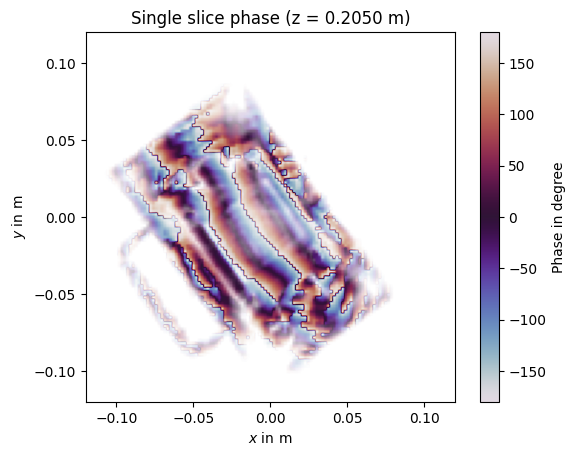

In [13]:

# 3 --> visualize the phase of a selected slice (opacity scaled by alpha_data)
_, V_slice_phase = complex2magphase(volume[:, :, Z_IDX - 1])
display(
    180 / math.pi * V_slice_phase,
    color_map=plt.get_cmap("twilight"),
    img_title=f"Single slice phase (z = {z_vec[Z_IDX - 1]:.4f} m)",
    cmap_label="Phase in degree",
    alphadata=alpha_data,
    xvec=x_vec,
    yvec=y_vec,
    xlabel="$x$ in m",
    ylabel="$y$ in m",
)


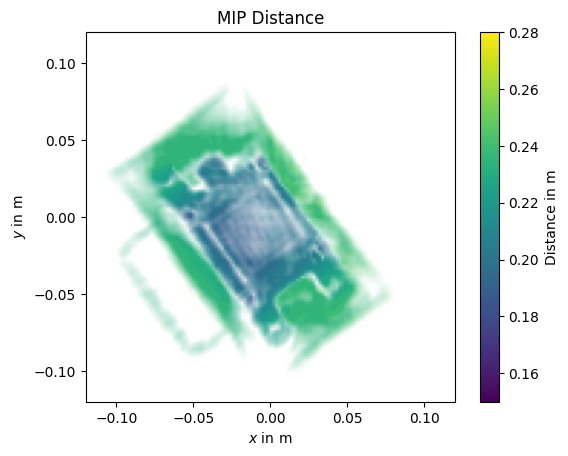

In [14]:

# 4 --> visualize the distance of the MIP (opacity scaled by alpha_data)
display(
    z_vec[kmax],
    img_title="MIP Distance",
    cmap_label="Distance in m",
    alphadata=alpha_data,
    xvec=x_vec,
    yvec=y_vec,
    clim=(0.15, 0.28),
    xlabel="$x$ in m",
    ylabel="$y$ in m",
)


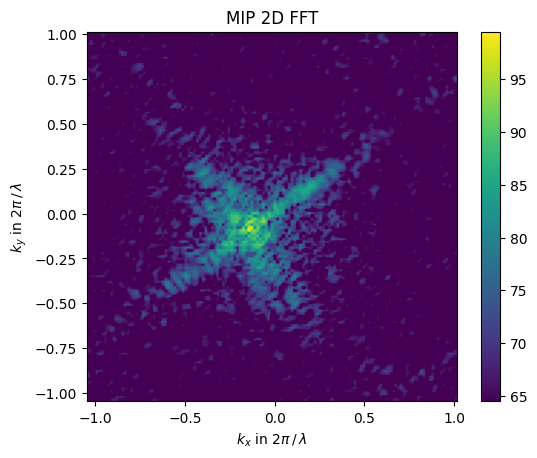

In [15]:

# 5 --> visualize the 2D FFT of the MIP
S_MIP = compute_fft(volume_max)
S_MIP_mag_dB = 20 * np.log10(np.abs(S_MIP))
display(
    S_MIP_mag_dB,
    img_title="MIP 2D FFT",
    dynamic_range=35,
    xvec=kx_n,
    yvec=ky_n,
    xlabel="$k_x$ in $2\\pi \\,/\\, \\lambda$",
    ylabel="$k_y$ in $2\\pi \\,/\\, \\lambda$",
)


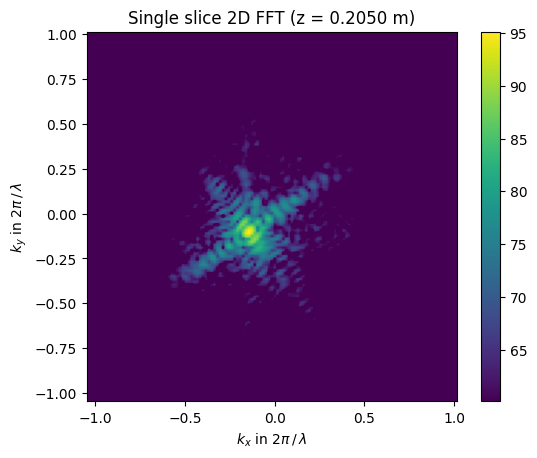

In [16]:

# 6 --> visualize the 2D FFT of a single slice
S_slice = compute_fft(volume[:, :, Z_IDX - 1])
S_slice_mag_dB = 20 * np.log10(np.abs(S_slice))
display(
    S_slice_mag_dB,
    img_title=f"Single slice 2D FFT (z = {z_vec[Z_IDX - 1]:.4f} m)",
    dynamic_range=35,
    xvec=kx_n,
    yvec=ky_n,
    xlabel="$k_x$ in $2\\pi \\,/\\, \\lambda$",
    ylabel="$k_y$ in $2\\pi \\,/\\, \\lambda$",
)